In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [3]:
# linear interpolation
def lerp(lo, hi, t):
    return lo * (1 - t) + hi * t

In [4]:
# smooth the interpolation
def smoothstep(t):
    return t * t * (3 - 2 * t)

In [5]:
def init_value_noise(table_size):
    return np.random.uniform(0.0, 1.0, table_size * table_size)

In [6]:
def build_permutation_table(table_size):
    a = np.arange(table_size)
    np.random.shuffle(a)
    b = a.copy()
    return np.hstack((a, b))

In [7]:
# generate 2D noise
def eval(x, y, table, table_size, permutation_table):
    xi = np.floor(x)
    yi = np.floor(y)

    tx = x - xi
    ty = y - yi

    # get coordinates in the table 
    rx0 = int(xi % (table_size - 1))
    rx1 = int((rx0 + 1) % (table_size - 1))
    ry0 = int(yi % (table_size - 1))
    ry1 = int((ry0 + 1) % (table_size - 1))
    
    # get values at corner of the 
    c00 = table[permutation_table[permutation_table[rx0] + ry0]]
    c10 = table[permutation_table[permutation_table[rx1] + ry0]]
    c01 = table[permutation_table[permutation_table[rx0] + ry1]]
    c11 = table[permutation_table[permutation_table[rx1] + ry1]]

    sx = smoothstep(tx)
    sy = smoothstep(ty)

    nx0 = lerp(c00, c10, sx)
    nx1 = lerp(c01, c11, sx)

    return lerp(nx0, nx1, sy)

## White noise

In [13]:
img = np.random.uniform(0.0, 1.0, 256 * 256).reshape((256, 256))
img *= 256.0

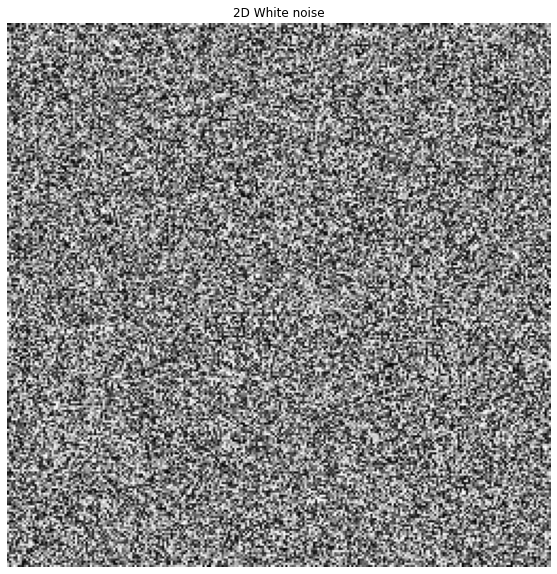

In [16]:
plt.imshow(img, cmap='gray')
plt.title("2D White noise")
plt.axis('off')
plt.show()

## Value noise

In [29]:
img = np.zeros((256, 256))

freq = 0.05

table = init_value_noise(256)
permutation_table = build_permutation_table(256)
for i in range(256):
    for j in range(256):
        img[i, j] = eval(i * freq, j * freq, table, 256, permutation_table)

img *= 256

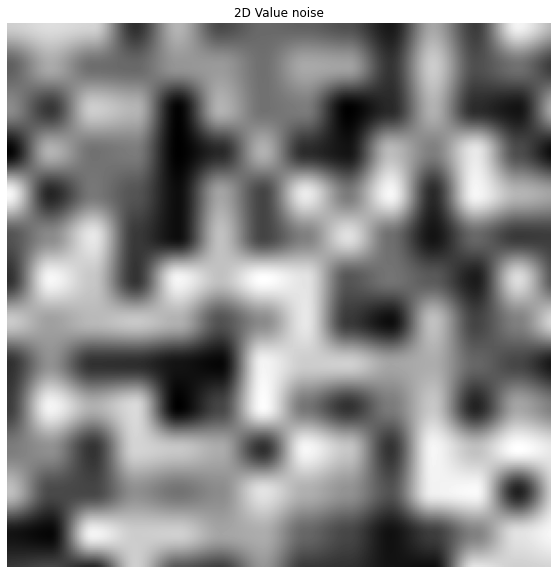

In [30]:
plt.imshow(img, cmap='gray')
plt.title("2D Value noise")
plt.axis('off')
plt.show()

## Fractal pattern

In [38]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 2.2
amplitudeFactor = 0.5
nb_layers = 7
curr_max_noise = 0

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        for k in range(nb_layers):
            img[i, j] += eval(val_i, val_j, table, 256, permutation_table) * amplitude
            val_i *= freqFactor 
            val_j *= freqFactor
            amplitude *= amplitudeFactor
        if img[i, j] > curr_max_noise:
            curr_max_noise = img[i, j]
img /= curr_max_noise

img *= 256

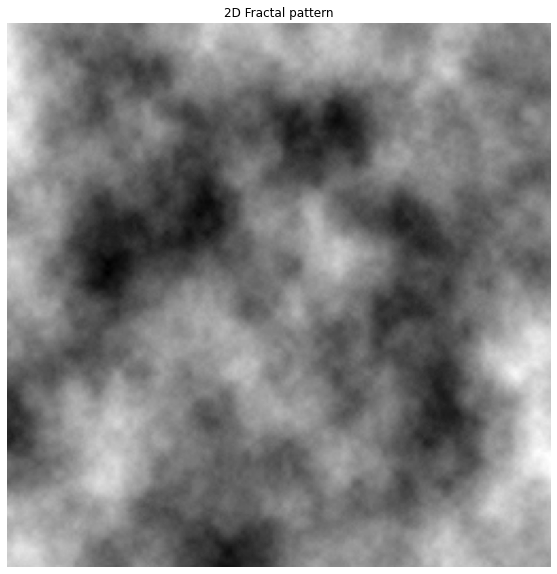

In [40]:
plt.imshow(img, cmap='gray')
plt.title("2D Fractal pattern")
plt.axis('off')
plt.show()

## Turbulence pattern

In [54]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 4.5
amplitudeFactor = 0.25
num_layers = 7
curr_max_noise = 0

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        for k in range(num_layers):
            img[i, j] += np.abs(2 * eval(val_i, val_j, table, 256, permutation_table) - 1) * amplitude
            val_i *= freqFactor
            val_j *= freqFactor
            amplitude *= amplitudeFactor

        if img[i, j] > curr_max_noise:
            curr_max_noise = img[i, j]

img /=  curr_max_noise

img *= 256

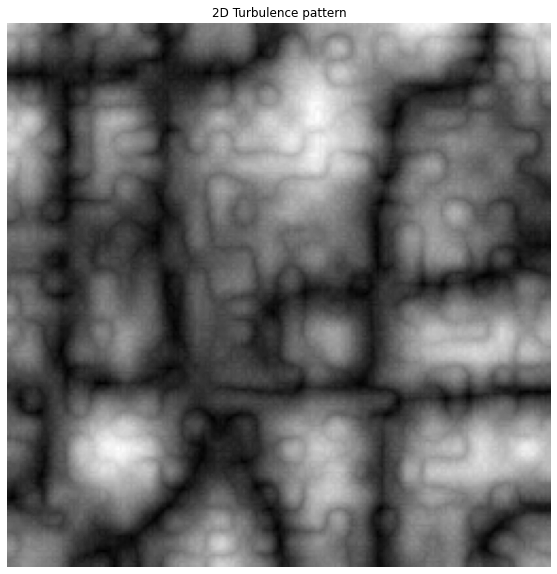

In [55]:
plt.imshow(img, cmap='gray')
plt.title("2D Turbulence pattern")
plt.axis('off')
plt.show()

# Marble Pattern

In [109]:
img = np.zeros((256, 256))

freq = 0.02
freqFactor = 1.8
amplitudeFactor = 0.35
num_layers = 7

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        amplitude = 1
        noiseVal = 0
        for k in range(num_layers):
            noiseVal += eval(val_i, val_j, table, 256, permutation_table) * amplitude
            val_i *= freqFactor
            val_j *= freqFactor
            amplitude *= amplitudeFactor

        img[i, j] = (np.sin((j + noiseVal * 100) * 2 * np.pi / 200.0) + 1) / 2.0
img *= 256

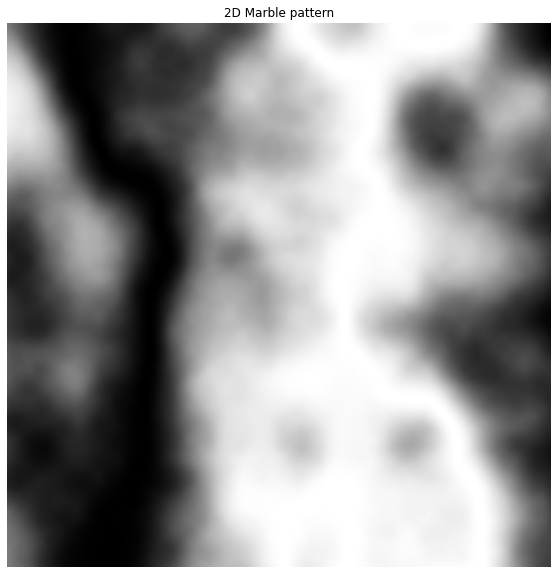

In [110]:
plt.imshow(img, cmap='gray')
plt.title("2D Marble pattern")
plt.axis('off')
plt.show()

## Wood Pattern

In [125]:
img = np.zeros((256, 256))

freq = 0.015

table = init_value_noise(256)
permutation_table = build_permutation_table(256)

for i in range(256):
    for j in range(256):
        val_i, val_j = i * freq, j * freq
        g = eval(val_i, val_j, table, 256, permutation_table) * 10
        img[i, j] = g - int(g)

img *= 256

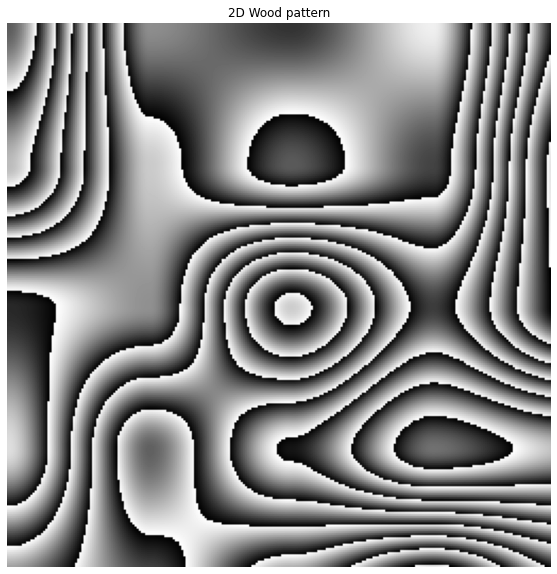

In [126]:
plt.imshow(img, cmap='gray')
plt.title("2D Wood pattern")
plt.axis('off')
plt.show()